# Выявление закономерностей, определяющих успешность компьютерной игры

Задача: выявить закономерности, определяющие успешность игры.


**Описание данных:**
    
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sale`s — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Открытие файла с данными и изучение общей информации

Импортируем необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.display import display


from math import factorial
from scipy import stats as st

from sklearn.preprocessing import LabelEncoder

Откроем файл с данными и запишем в переменную `data`. Посмотрим на первые 5 строк таблицы `data` и выведем общую информацию о таблице:

In [ ]:
data = pd.read_csv('/datasets/games.csv')
print(display(data.head()))
print(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Выведем общую статистическую информацию о численных данных таблицы, проверим колиество дубликатов, посмотрим количество уникальных значений для признаков, имеющих тип `object`:

In [ ]:
print(display(data.describe()))

print('Дубликатов:', data.duplicated().sum())

for column in data:
        if data[column].dtype == 'object':
            print('Признак:', column)
            print('Уникальные:', data[column].value_counts().count())
            print()


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


None
Дубликатов: 0
Признак: Name
Уникальные: 11559

Признак: Platform
Уникальные: 31

Признак: Genre
Уникальные: 12

Признак: User_Score
Уникальные: 96

Признак: Rating
Уникальные: 8



### Вывод

- Мы открыли и изучили таблицу.
- Обнаружили, что наименования столбцов не приведены к нижнему регистру.
- Обнаружили, что в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` имеются пропущенные значения.
- Дубликатов данных не найдено. Имеются дублирующие названия игр (`Name`).
- `Platform`, `Genre`, `User_Score`, `Rating` - категориальные признаки.

## Шаг 2. Подготовка данных

Приведем названия столбцов таблицы `data` к нижнему регистру:

In [ ]:
data.set_axis(data.columns.str.lower(),axis = 'columns',inplace = True)
print(display(data.head()))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


None


Посмотрим на количество нулевых значений `user_score` и `critic_score`:

In [ ]:
print('Нулевых значений "user_score":', data.query('user_score==0')['user_score'].count())
print('Нулевых значений "critic_score":', data.query('rating==0')['user_score'].count())

Нулевых значений "user_score": 0
Нулевых значений "critic_score": 0


Преобразуем данные к нужным типам: `user_score` переведем в формат `float64`. Аббривеатура `tbd` в строках с оценкой пользователей означает, что оценка еще не определена (от "to be definied"). Заменим эти значения на 0 (в дальнейшем будем отсекать эти значения).

In [ ]:
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year
data['user_score'] = data['user_score'].replace('tbd', 0)
data['user_score'] = pd.to_numeric(data['user_score'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Заполним пропуски в столбцах `user_score` и `critic_score` нулевыми значениями (в дальнейшем будем отсекать эти значения). Причина появления этих пропусков - возможно, такие данные не удалось собрать.

In [ ]:
data['user_score'] = data['user_score'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Заполним пропуски в столбцах `name` и `genre` - их всего по 2. Скорее всего их причина - ошибки при вводе данных (забыли заполнить поле). Заменим наименованием `'unknown'`:

In [ ]:
data['name'] = data['name'].fillna('unknown')
data['genre']= data['genre'].fillna('unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Пропуски в колонке `year_of_release` могут быть по разным причинам, например, релизов было несколько, или неизвестно, когда он был. Оставим эти пропуски. 

Пропуски в колонке `rating` скорее всего связаны с тем, что эти данные не удалось выяснить. Заменим пропуски аббривеатурой `'tbd'`(от "to be definied"):

In [ ]:
data['rating'] = data['rating'].fillna('tbd')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Закодируем значения рейтинга при помощи `LabelEncoder`, запишем в новый столбец `rating_le`:

In [ ]:
le = LabelEncoder()
le.fit(data['rating'])
data['rating_le'] = le.transform(data['rating'])

Сделаем дополнительный столбец `all_sales` - суммарные продажи во всех регионах, и посчитаем их:

In [ ]:
data.insert(8, 'all_sales', '0')

data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

print(display(data.head()))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating,rating_le
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,1
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,0.0,0.0,tbd,8
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,0.0,0.0,tbd,8


None


<a id='section21'></a>

### Вывод

- Мы привели названия столбцов таблицы `data` к нижнему регистру.
- Мы преобразовали данные к нужным типам: `user_score` перевели в формат `float64`. Заменили аббривеатуру `'tbd'` в `user_score`на 0.
- Мы заполнили пропуски в столбцах `user_score` и `critic_score` нулевыми значениями (в дальнейшем будем отсекать эти значения). 
- Заполнили пропуски в столбцах `name` и `genre`, заменив наименованием `'unknown'`.
- Пропуски в колонке `year_of_release` оставили без изменений.
- Заменили пропуски в колонке `rating` аббривеатурой `'tbd'`(от "to be definied"). Закодировали значения рейтинга при помощи `LabelEncoder`, записали в новый столбец `rating_le`.
- Добавили столбец `all_sales` - суммарные продажи во всех регионах.

## Шаг 3. Исследовательский анализ данных

Составим функцию, которая будет удобно отображать рейтинг:

In [ ]:
def ranking(y, title='', xl = '', yl = ''):
    y_pos = np.arange(len(y),0,-1)
    plt.figure(figsize=(round(len(y)/2.5),round(len(y)/2.5)))
    cmap = mpl.cm.plasma_r
    bar_colors = cmap(y.values/y.values.max())    
    plt.barh(y_pos, width=y, height=0.6, left=None, align='center', color=bar_colors, alpha = 0.8)
    plt.yticks(y_pos, y.index)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)
    for p, c, ch in zip(y_pos, y.index, round(y,4)):
        plt.annotate(str(ch), xy=(ch if ch>0 else 0, p), va='center')

Посмотрим, сколько игр выпускалось в разные годы:

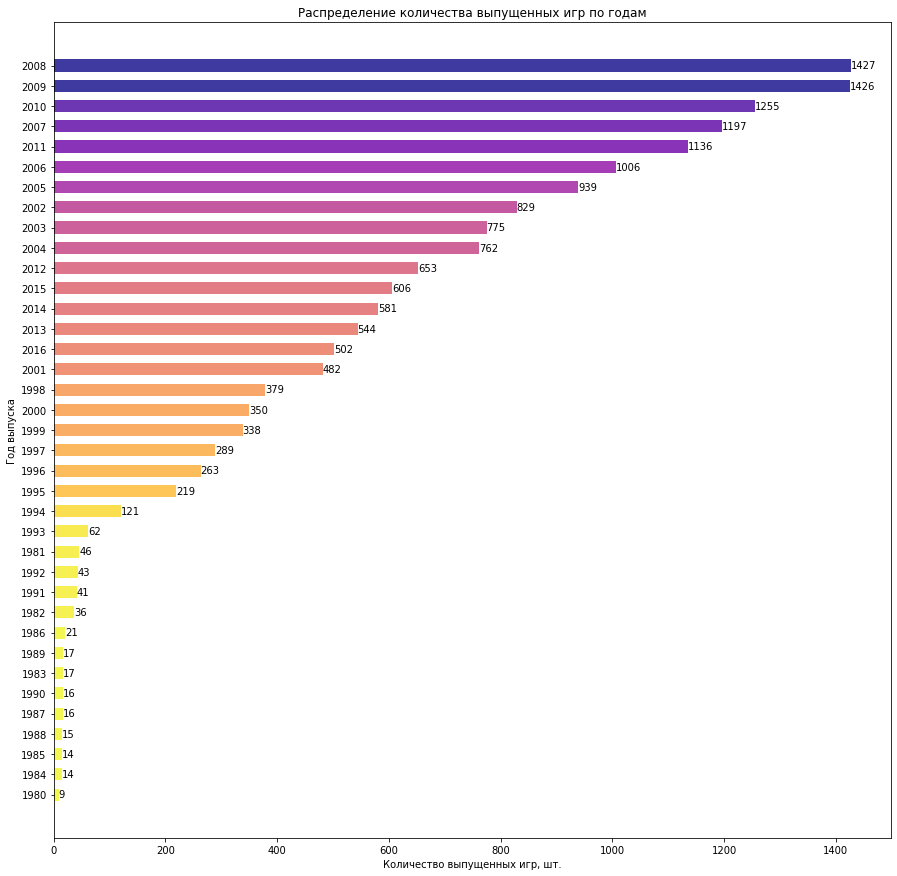

In [ ]:
year_counts = data['year_of_release'].value_counts()
year_counts.index = year_counts.index.astype(int)
ranking(year_counts, "Распределение количества выпущенных игр по годам", 'Количество выпущенных игр, шт.', 'Год выпуска')

Больше всего игр по нашим данным выпускалось в 2008 году.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами:

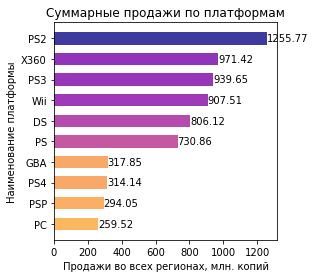

In [ ]:
platform_sales = data.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales', ascending = False).head(10)
ranking(platform_sales['all_sales'], "Суммарные продажи по платформам", "Продажи во всех регионах, млн. копий", "Наименование платформы")
platform_sales = platform_sales.reset_index()

 Построим для них распределение по годам:

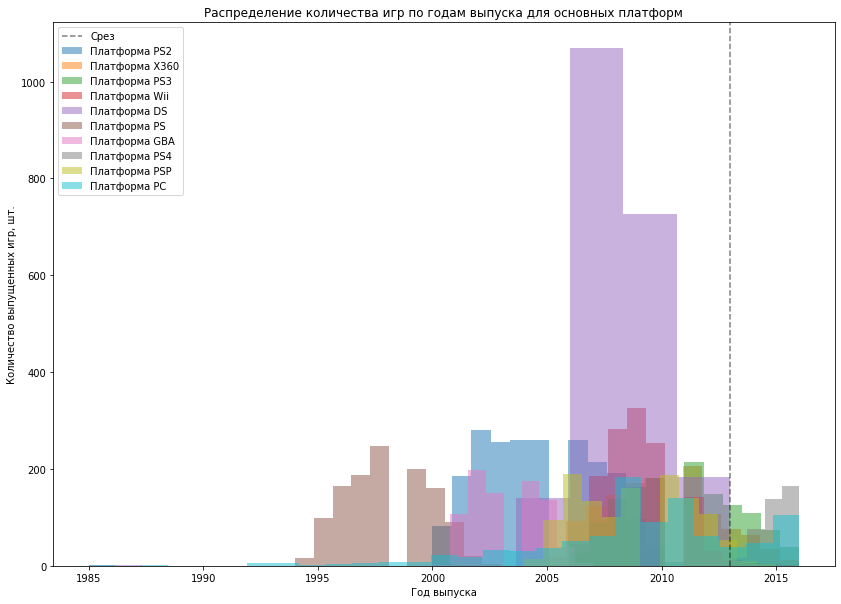

In [ ]:
legend = ['Срез']
for plat in platform_sales['platform']:
    bins =len( data.query('platform == @plat')['year_of_release'].unique())
    data.query('platform == @plat')['year_of_release'].plot(kind = 'hist', bins = bins, figsize= (14,10), alpha = 0.5)
    legend.append('Платформа '+ plat)
plt.axvline(2013, ls = '--', color ='k', alpha = 0.5)
plt.legend(legend)
plt.title('Распределение количества игр по годам выпуска для основных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр, шт.')
plt.show()



<a id='section31'></a>

Мы видим, что наиболее существенный вклад в общую картину на 2016 год дают игры, выпущенные с 2013 по 2016. Примем этот период за актуальный для составления прогноза и не будем учитывать игры, выпущенные за предыдущие годы (сделаем еще одну таблицу `data_filtered`):

In [ ]:
data_filtered = data.query('2013<=year_of_release<=2016')

Ответим на вопрос: какие платформы лидируют по продажам, растут или падают?

In [ ]:
platform_sales = data_filtered.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales', ascending = False).head(10)
platform_sales = platform_sales.reset_index()

In [ ]:
print('Лидирующая платформа:')
lider = {}
for year in range(2013,2017):
    lider[year]= (data_filtered.query('year_of_release == @year').
                    groupby('platform').agg({'all_sales': 'sum'}).
                    sort_values(by='all_sales', ascending = False).
                    head(1).
                    reset_index()['platform'].values[0])
    print(year, lider[year])


print()
print('Растущие платформы:')
ascend = {}
for plat in platform_sales['platform']:
    ascend[plat] = []
    for year in range(2013,2017):
        if data_filtered.query('(year_of_release == @year) and (platform == @plat)')['all_sales'].sum() > data_filtered.query('(year_of_release == @year-1) and (platform == @plat)')['all_sales'].sum():
            ascend[plat].append(year)
    print(plat, ascend[plat])       
    
    
print()
print('Падающие платформы:')
ascend = {}
for plat in platform_sales['platform']:
    ascend[plat] = []
    for year in range(2013,2017):
        if data_filtered.query('(year_of_release == @year) and (platform == @plat)')['all_sales'].sum() < data_filtered.query('(year_of_release == @year-1) and (platform == @plat)')['all_sales'].sum():
            ascend[plat].append(year)
    print(plat, ascend[plat])   

Лидирующая платформа:
2013 PS3
2014 PS4
2015 PS4
2016 PS4

Растущие платформы:
PS4 [2013, 2014, 2015]
PS3 [2013]
XOne [2013, 2014, 2015]
3DS [2013]
X360 [2013]
WiiU [2013, 2014]
PC [2013, 2014]
PSV [2013, 2014]
Wii [2013]
PSP [2013]

Падающие платформы:
PS4 [2016]
PS3 [2014, 2015, 2016]
XOne [2016]
3DS [2014, 2015, 2016]
X360 [2014, 2015, 2016]
WiiU [2015, 2016]
PC [2015, 2016]
PSV [2015, 2016]
Wii [2014, 2015, 2016]
PSP [2014, 2015, 2016]


В 2016 году лидирующая платформа PS4, нет растущих платформ, падают платформы PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

0     PS4
1     PS3
2    XOne
3     3DS
4    X360
5    WiiU
6      PC
7     PSV
8     Wii
9     PSP
Name: platform, dtype: object


Text(0.5, 1.0, 'Boxplot -  глобальные продажи игр в разбивке по платформам (0 - PS4, 1 - PS3 2- XOne, 3 - 3DS, 4 - X360, 5 - WiiU, 6 - PC, 7 - PSV,8 - Wii, 9 - PSP)')

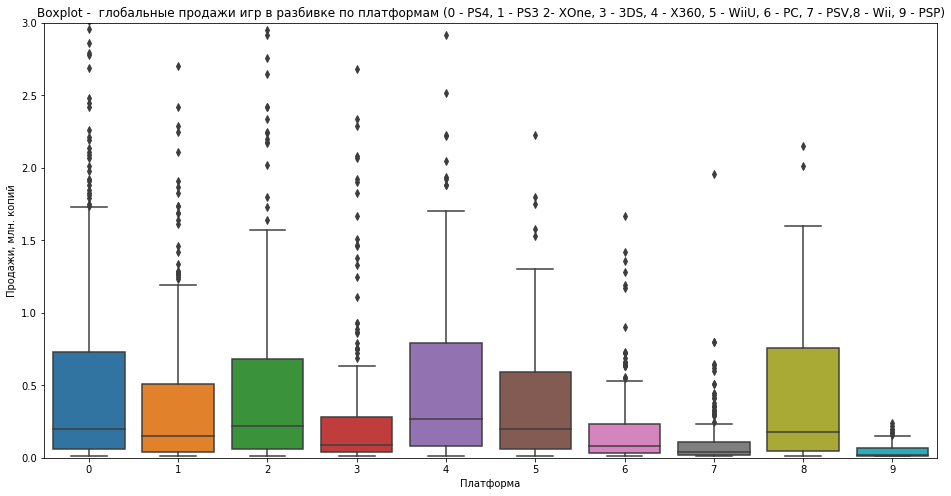

In [ ]:
print(platform_sales['platform'])
plt.figure(figsize=(16, 8))
d = []

for plat in platform_sales['platform']:    
        d.append([data_filtered.query('platform == @plat')['all_sales']])

ax = sns.boxplot(data = d)
plt.ylim((0, 3))
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформа')
plt.title('Boxplot -  глобальные продажи игр в разбивке по платформам (0 - PS4, 1 - PS3 2- XOne, 3 - 3DS, 4 - X360, 5 - WiiU, 6 - PC, 7 - PSV,8 - Wii, 9 - PSP)')

По диаграмме boxplot видно, что самый большой разброс суммы продаж у платформ PS4, X360 и  Wii, самый маленький - у платформы PSP. Все распределения достатоно сильно скошены вправо.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  Рассмотрим платформу PS3. Построим диаграммы рассеяния (сравним с линейным приближением на графике) и посчитаем корреляцию между отзывами и продажами:

Корреляция между продажами и оценками пользователей: 0.0023944027357566925


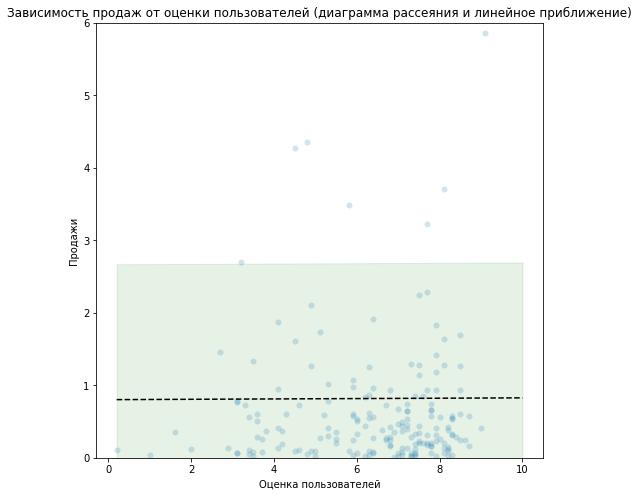

In [ ]:
plt.figure(figsize = (8,8))

x = data_filtered.query('user_score != 0 and platform == "PS3"')['user_score']
y = data_filtered.query('user_score != 0 and platform == "PS3"')['all_sales']
plt.ylim((0, 6))
plt.plot(x, y, 'o', mec='none', alpha=.2)

# the raw data



params = np.polyfit(x, y, 1)
xp = np.linspace(x.min(),10 ,3)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k', linestyle = '--')

#overplot an error band
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='green', alpha=0.1)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценки пользователей (диаграмма рассеяния и линейное приближение)')
print('Корреляция между продажами и оценками пользователей:', x.corr(y))

Между оценками пользователей и продажами наблюдается очень слабая положительная корреляция.

Корреляция между продажами и оценками критиков: 0.3342853393371919


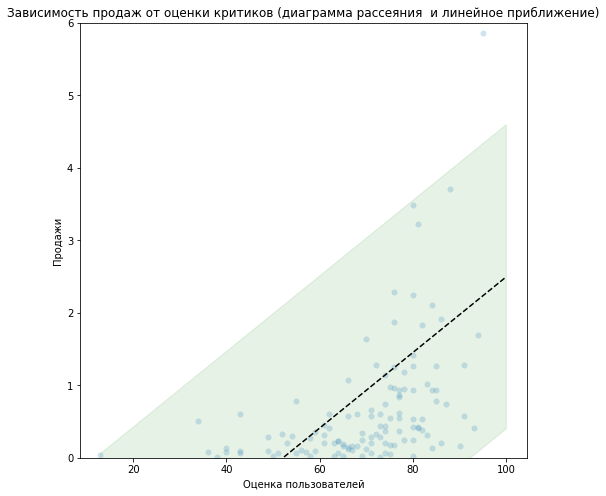

In [ ]:
plt.figure(figsize = (8,8))

x = data_filtered.query('critic_score != 0 and platform == "PS3"')['critic_score']
y = data_filtered.query('critic_score != 0 and platform == "PS3"')['all_sales']
plt.ylim((0, 6))
plt.plot(x, y, 'o', mec='none', alpha=.2)

# the raw data



params = np.polyfit(x, y, 1)
xp = np.linspace(x.min(),100 ,100)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k', linestyle = '--')

#overplot an error band
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='green', alpha=0.1)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценки критиков (диаграмма рассеяния  и линейное приближение)')
print('Корреляция между продажами и оценками критиков:', x.corr(y))

 Между оценками критиков и продажами наблюдается слабая положительная корреляция. Она сильнее, чем между отзывами пользователей и продажами.

Посмотрим, так ли для других платформ:

In [ ]:
for plat in platform_sales['platform'][0:7]:
    x = data_filtered.query('user_score != 0 and platform == @plat')['user_score']
    y = data_filtered.query('user_score != 0 and platform == @plat')['all_sales']
    print('Корреляция между продажами и оценками пользователей для платформы {}: {}'.format(plat, x.corr(y)))

Корреляция между продажами и оценками пользователей для платформы PS4: -0.031957110204556424
Корреляция между продажами и оценками пользователей для платформы PS3: 0.0023944027357566925
Корреляция между продажами и оценками пользователей для платформы XOne: -0.06892505328279414
Корреляция между продажами и оценками пользователей для платформы 3DS: 0.24150411773563016
Корреляция между продажами и оценками пользователей для платформы X360: -0.011742185147181342
Корреляция между продажами и оценками пользователей для платформы WiiU: 0.4193304819266187
Корреляция между продажами и оценками пользователей для платформы PC: -0.0938418695247674


In [ ]:
for plat in platform_sales['platform'][0:7]:
    x = data_filtered.query('critic_score != 0 and platform == @plat')['critic_score']
    y = data_filtered.query('critic_score != 0 and platform == @plat')['all_sales']
    print('Корреляция между продажами и оценками критиков для платформы {}: {}'.format(plat, x.corr(y)))

Корреляция между продажами и оценками критиков для платформы PS4: 0.40656790206178095
Корреляция между продажами и оценками критиков для платформы PS3: 0.3342853393371919
Корреляция между продажами и оценками критиков для платформы XOne: 0.4169983280084017
Корреляция между продажами и оценками критиков для платформы 3DS: 0.3570566142288103
Корреляция между продажами и оценками критиков для платформы X360: 0.3503445460228664
Корреляция между продажами и оценками критиков для платформы WiiU: 0.3764149065423912
Корреляция между продажами и оценками критиков для платформы PC: 0.19603028294369382


Как видим, наши выводы верны не для всех платформ. Для некоторых корреляция между продажами и оценками пользователей слабая положительная, для некоторых - даже очень слабая отрицательная. Но для всех платформ корреляция между продажами и оценками критиков положительна и больше первой корреляции.

Посмотрим на общее распределение игр по жанрам:

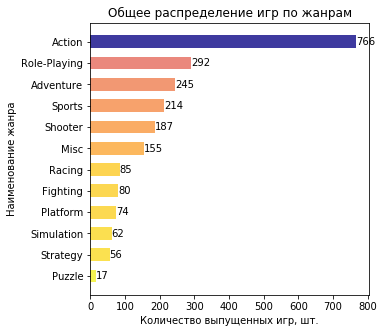

In [ ]:
ranking(data_filtered['genre'].value_counts(), "Общее распределение игр по жанрам", "Количество выпущенных игр, шт.", "Наименование жанра")

Самые популярные игры - жанра Action.

Посмотрим на распределение продаж по жанрам:

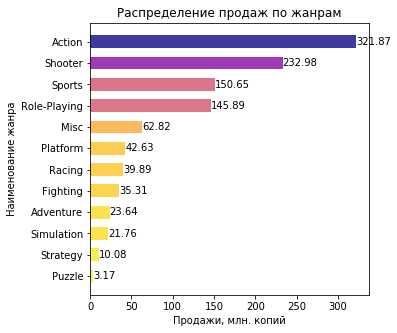

In [ ]:
genre_sales = data_filtered.groupby('genre').agg({'all_sales': 'sum'}).sort_values(by='all_sales', ascending = False)
ranking(genre_sales['all_sales'], "Распределение продаж по жанрам", "Продажи, млн. копий", "Наименование жанра")

Самый прибыльный жанр - Action. Самый малоприбыльный - Puzzle.  Мы видим разницу в продажах между разными жанрами примерно на два порядка, поэтому можно сказать, что выделяются жанры с высокими и низкими продажами. 

### Вывод

- Мы рассмотрели, сколько игр выпускалось в разные годы. Больше всего игр выпускалось в 2008 году.


- Мы выбрали платформы с наибольшими суммарными продажами и посмотрели по ним распределение количества выпущенных игр по годам.


- Наиболее существенный вклад в общую картину дают игры, выпущенные с 2013 по 2016. Мы приняли этот период за актуальный для составления прогноза и не учитывали игры, выпущенные за предыдущие годы.


- Мы ответили на вопрос: какие платформы лидируют по продажам, растут или падают для разных лет. В 2016 году лидирующая платформа PS4, нет растущих платформ, падают платформы PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP.


- Мы построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Самый большой разброс суммы продаж у платформ PS4, X360 и  Wii, самый маленький - у платформы PSP. Все распределения достаточно сильно скошены вправо.


- Мы посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Рассмотрели на примере платформы PS3. Построили диаграммы рассеяния (сравнили с линейным приближением на графике) и посчитаели корреляцию между отзывами и продажами. Между оценками критиков и продажами наблюдается слабая положительная корреляция. Она сильнее, чем между отзывами пользователей и продажами. Наши выводы верны не для всех платформ (рассмотрели другие платформы далее). Для некоторых корреляция между продажами и оценками пользователей слабая положительная, для некоторых - даже очень слабая отрицательная. Но для всех платформ корреляция между продажами и оценками критиков положительна и больше первой корреляции.


- Мы посмотрели на общее распределение игр по жанрам. Выяснили, что самые популярные игры - жанра Action. 


- Самый прибыльный жанр - Action. Самый малоприбыльный - Puzzle.  Мы видим разницу в продажах между разными жанрами примерно на два порядка, поэтому можно сказать, что выделяются жанры с высокими и низкими продажами. 



## Шаг 4. Портрет пользователя

Определим для пользователя каждого региона (NA, EU, JP)	самые популярные платформы (топ-5). 

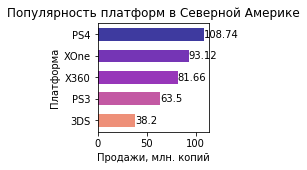

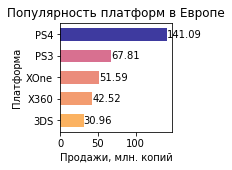

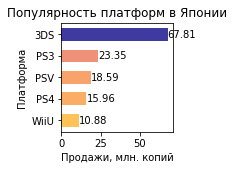

In [ ]:
na_platform = data_filtered.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending = False).head(5)
ranking(na_platform['na_sales'], 'Популярность платформ в Северной Америке', 'Продажи, млн. копий', 'Платформа')

eu_platform = data_filtered.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending = False).head(5)
ranking(eu_platform['eu_sales'], 'Популярность платформ в Европе', 'Продажи, млн. копий', 'Платформа')

jp_platform = data_filtered.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending = False).head(5)
ranking(jp_platform['jp_sales'], 'Популярность платформ в Японии', 'Продажи, млн. копий', 'Платформа')


Самая популярная платформа в Северной Америке и Европе - PS4, в Японии - 3DS. На втором месте В Японии и Европе PS3, в Северной Америке - XOne.

Определим для пользователя каждого региона (NA, EU, JP)	самые популярные жанры (топ-5). 

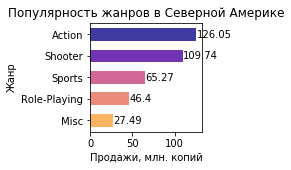

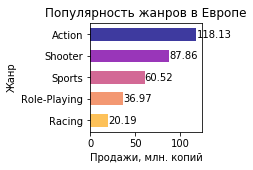

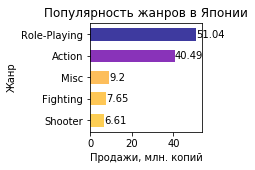

In [ ]:
na_genre = data_filtered.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending = False).head(5)
ranking(na_genre['na_sales'], 'Популярность жанров в Северной Америке', 'Продажи, млн. копий', 'Жанр')

eu_genre = data_filtered.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending = False).head(5)
ranking(eu_genre['eu_sales'], 'Популярность жанров в Европе', 'Продажи, млн. копий', 'Жанр')

jp_genre = data_filtered.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending = False).head(5)
ranking(jp_genre['jp_sales'], 'Популярность жанров в Японии', 'Продажи, млн. копий', 'Жанр')


Вкусы пользователей Северной Америки и Европы похожи, на персом месте жанр Action, различается лишь пятая позиция: в Северной Америке предпочитают Misc, а в Европе Racing. Вкусы пользователей из Японии существенно отличаются: Role-Playing тут на первом месте, Action только на втором.

Ответим на вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе? Для этого рассмотрим корреляцию между рейтингом и продажами в регионах (не будем учитывать значение рейтинга 'tbd'):


In [ ]:
print('Корреляция между рейтингом и продажами в Северной Америке', data_filtered['na_sales'].corr(data.query('rating_le !=8')['rating_le']))
print('Корреляция между рейтингом и продажами в Европе', data_filtered['eu_sales'].corr(data.query('rating_le !=8')['rating_le']))
print('Корреляция между рейтингом и продажами в Японии', data_filtered['jp_sales'].corr(data.query('rating_le !=8')['rating_le']))

Корреляция между рейтингом и продажами в Северной Америке -0.010823355131424569
Корреляция между рейтингом и продажами в Европе -0.030271524671098338
Корреляция между рейтингом и продажами в Японии 0.04912037471467757


Мы видим, что между рейтингом и продажами наблюдается очень слабая корреляция. Рейтинг очень слабо вляет на продажи в регионах.

Узнаем, как соотносятся плотформы и жанры у каждого конкретного пользователя, то есть опишем портрет типичного пользователя из каждого региона:

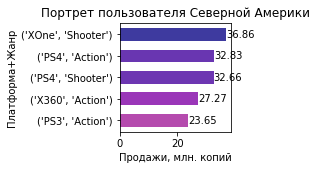

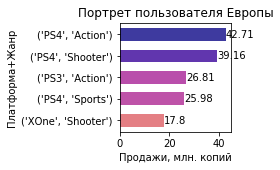

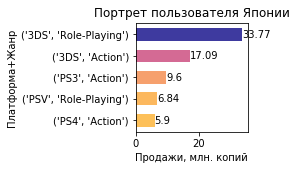

In [ ]:
na_user = data_filtered.groupby(['platform','genre']).agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending = False).head(5)
ranking(na_user['na_sales'], 'Портрет пользователя Северной Америки', 'Продажи, млн. копий', 'Платформа+Жанр')

eu_user = data_filtered.groupby(['platform','genre']).agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending = False).head(5)
ranking(eu_user['eu_sales'], 'Портрет пользователя Европы', 'Продажи, млн. копий', 'Платформа+Жанр')

jp_user = data_filtered.groupby(['platform','genre']).agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending = False).head(5)
ranking(jp_user['jp_sales'], 'Портрет пользователя Японии', 'Продажи, млн. копий', 'Платформа+Жанр')

- Портрет типичного пользователя из Северной Америки: играет на платформе XOne в Shooter игры.
- Портрет типичного пользователя из Европы: играет на платформе PS4 в Action игры.
- Портрет типичного пользователя из Европы: играет на платформе  3DS в Role-Playing игры.

### Вывод

- Мы определили для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Самая популярная платформа в Северной Америке и Европе - PS4, в Японии - 3DS. На втором месте В Японии и Европе PS3, в Северной Америке - XOne.


- Мы определили для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Вкусы пользователей Северной Америки и Европы похожи, на персом месте жанр Action, различается лишь пятая позиция: в Северной Америке предпочитают Misc, а в Европе Racing. Вкусы пользователей из Японии существенно отличаются: Role-Playing тут на первом месте, Action только на втором.

- Ответили на вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе? Для этого рассмотрели корреляцию. Рейтинг очень слабо вляет на продажи в регионах.


- Портрет типичного пользователя из Северной Америки: играет на платформе XOne в Shooter игры.
- Портрет типичного пользователя из Европы: играет на платформе PS4 в Action игры.
- Портрет типичного пользователя из Европы: играет на платформе  3DS в Role-Playing игры.

<a id='section5'></a>

## Шаг 5. Проверка гипотез

Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Нулевая гипотеза: средние пользовательские оценки платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: средние пользовательские оценки платформ Xbox One и PC различаются.

Просмотрим список уникальных значений названий платформ, чтобы найти нужные нам:

In [ ]:
data_filtered['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Сделаем выборки:

In [ ]:
sample_xone = data_filtered.query('platform == "XOne" and user_score != 0 and critic_score != 0')['user_score']
sample_pc = data_filtered.query('platform == "PC" and user_score != 0 and critic_score != 0')['user_score']

Посчитаем, отличаются ли дисперсии двух выборок больше, чем на 5%:

In [ ]:
var1 = np.var(sample_xone)
var2 = np.var(sample_pc) 
if abs(var1 - var2)/min(var1, var2) >0.05:
    print('Дисперсии отличаются больше, чем на 5%')
else:
    print('Дисперсии отличаются не больше, чем на 5%')

Дисперсии отличаются больше, чем на 5%


Воспользуемся t-тестом для определения равенства средних двух генеральных совокупностей по двум выборкам. Пороговое значение `p-value` примем равным 5% или 0.05 (общепринятое пороговое значение). Дисперсии выборок отличаются больше, чем на 5%, значит, мы можем использовать значение `equal_var = False`:

In [ ]:
results = st.ttest_ind(sample_xone, sample_pc, equal_var = False)
# equal_var - считать ли равными дисперсии выборок, по умолчанию имеет значение True
treshhold = 0.05
print('p-значение: ', results.pvalue)
if results.pvalue > treshhold:
    print("Принимает 0 гипотезу")
else:
    print('Отвергаем нулевую гипотезу')

p-значение:  0.17882648263401307
Принимает 0 гипотезу


Мы принимаем нулевую гипотезу - средние пользовательские оценки платформ Xbox One и PC одинаковые.

Проверим гипотезу: cредние пользовательские рейтинги жанров Action и Sports разные.

- Нулевая гипотеза: cредние пользовательские оценки жанров Action и Sports одинаковые.
- Альтернативная гипотеза: cредние пользовательские оценки жанров Action и Sports разные.

Сделаем выборки:

In [ ]:
sample_action = data_filtered.query('genre == "Action " and user_score != 0 and critic_score != 0')['user_score']
sample_sports = data_filtered.query('genre == "Sports" and user_score != 0 and critic_score != 0')['user_score']

Посчитаем, отличаются ли дисперсии двух выборок больше, чем на 5%:

In [ ]:
var1 = np.var(sample_action)
var2 = np.var(sample_sports) 
if abs(var1 - var2)/min(var1, var2) >0.05:
    print('Дисперсии отличаются больше, чем на 5%')
else:
    print('Дисперсии отличаются не больше, чем на 5%')

Дисперсии отличаются не больше, чем на 5%


Воспользуемся t-тестом для определения равенства средних двух генеральных совокупностей по двум выборкам. Пороговое значение `p-value` примем равным 5% или 0.05 (общепринятое пороговое значение). Дисперсии выборок отличаются не больше, чем на 5%, значит, мы можем использовать значение `equal_var = True`:

In [ ]:
results = st.ttest_ind(sample_xone, sample_pc, equal_var = True)
# equal_var - считать ли равными дисперсии выборок, по умолчанию имеет значение True
treshhold = 0.05
print('p-значение: ', results.pvalue)
if results.pvalue > treshhold:
    print("Принимает 0 гипотезу")
else:
    print('Отвергаем нулевую гипотезу')

p-значение:  0.17306926618147322
Принимает 0 гипотезу


Мы принимаем нулевую гипотезу: cредние пользовательские оценки жанров Action и Sports одинаковые.

### Вывод

- Мы проверили гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Она подтверждена.
- Мы проверили гипотезу:  cредние пользовательские рейтинги жанров Action и Sports разные. Она не подтверждена.

## Шаг 6. Общий вывод

- Мы открыли данные и записали в таблицу `data`.
- Мы привели названия столбцов таблицы `data` к нижнему регистру.
- Мы преобразовали данные к нужным типам: `user_score` перевели в формат `float64`. Заменили аббривеатуру `'tbd'` в `user_score`на 0.
- Мы заполнили пропуски в столбцах `user_score` и `critic_score` нулевыми значениями (в дальнейшем будем отсекать эти значения). 
- Заполнили пропуски в столбцах `name` и `genre`, заменив наименованием `'unknown'`.
- Пропуски в колонке `year_of_release` оставили без изменений.
- Заменили пропуски в колонке `rating` аббривеатурой `'tbd'`(от "to be definied"). Закодировали значения рейтинга при помощи `LabelEncoder`, записали в новый столбец `rating_le`.
- Добавили столбец `all_sales` - суммарные продажи во всех регионах.

- Мы рассмотрели, сколько игр выпускалось в разные годы. Больше всего игр выпускалось в 2008 году.


- Мы выбрали платформы с наибольшими суммарными продажами и посмотрели по ним распределение количества выпущенных игр по годам.


- Наиболее существенный вклад в общую картину дают игры, выпущенные с 2013 по 2016. Мы приняли этот период за актуальный для составления прогноза и не учитывали игры, выпущенные за предыдущие годы.


- Мы ответили на вопрос: какие платформы лидируют по продажам, растут или падают для разных лет. В 2016 году лидирующая платформа PS4, нет растущих платформ, падают платформы PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP.


- Мы построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Самый большой разброс суммы продаж у платформ PS4, X360 и  Wii, самый маленький - у платформы PSP. Все распределения достаточно сильно скошены вправо.


- Мы посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Рассмотрели на примере платформы PS3. Построили диаграммы рассеяния (сравнили с линейным приближением на графике) и посчитаели корреляцию между отзывами и продажами. Между оценками критиков и продажами наблюдается слабая положительная корреляция. Она сильнее, чем между отзывами пользователей и продажами. Наши выводы верны не для всех платформ (рассмотрели другие платформы далее). Для некоторых платформ корреляция между продажами и оценками пользователей даже слабая отрицательная. Но для всех платформ корреляция между продажами и оценками критиков положительна и больше корреляции между продажами и оценками пользователей .


- Мы посмотрели на общее распределение игр по жанрам. Выяснили, что самые популярные игры - жанра Action. 


- Самый прибыльный жанр - Action. Самый малоприбыльный - Puzzle. Можно сказать, что выделяются жанры с высокими и низкими продажами.


- Мы определили для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Самая популярная платформа в Северной Америке и Европе - PS4, в Японии - 3DS. На втором месте В Японии и Европе PS3, в Северной Америке - XOne.


- Мы определили для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Вкусы пользователей Северной Америки и Европы похожи, на персом месте жанр Action, различается лишь пятая позиция: в Северной Америке предпочитают Misc, а в Европе Racing. Вкусы пользователей из Японии существенно отличаются: Role-Playing тут на первом месте, Action только на втором.


- Ответили на вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе? Для этого рассмотрели корреляцию. Рейтинг очень слабо вляет на продажи в регионах.


  - Портрет типичного пользователя из Северной Америки: играет на платформе XOne в Shooter игры.
  - Портрет типичного пользователя из Европы: играет на платформе PS4 в Action игры.
  - Портрет типичного пользователя из Европы: играет на платформе  3DS в Role-Playing игры.


- Мы проверили гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Она подтверждена.
- Мы проверили гипотезу:  cредние пользовательские рейтинги жанров Action и Sports разные. Она не подтверждена.
